In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
X, Y = make_circles(n_samples=500, noise=0.02)

In [3]:
print(X.shape, Y.shape)

(500, 2) (500,)


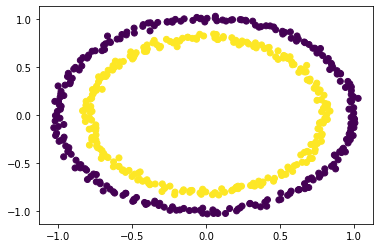

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [5]:
def phi(X):
    X1 = X[:, 0]
    X2 = X[:, 1]
    X3 = X1**2 + X2**2

    X_ = np.zeros((X.shape[0], 3))
    print(X_.shape)
    X_[:, :-1] = X
    X_[:, -1] = X3
    return X_

In [6]:
X_ = phi(X)

(500, 3)


In [7]:
print(X[:3,:])

[[-0.48703916 -0.89419344]
 [-1.00754782 -0.01168549]
 [ 0.35796609  0.91268329]]


In [8]:
print(X_[:3,:])

[[-0.48703916 -0.89419344  1.03678905]
 [-1.00754782 -0.01168549  1.01528916]
 [ 0.35796609  0.91268329  0.9611305 ]]


In [9]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax

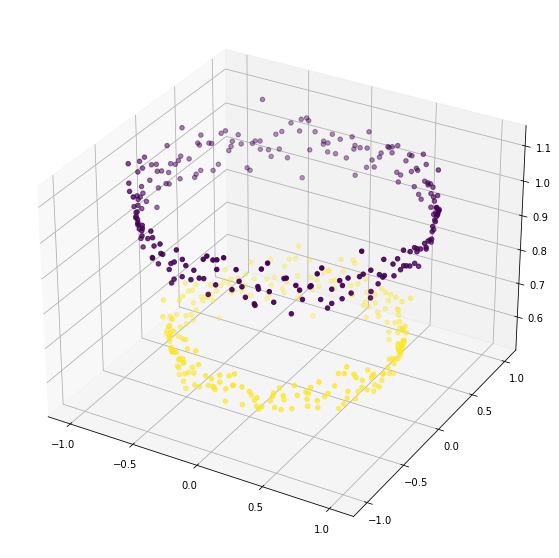

In [10]:
ax = plot3d(X_)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [12]:
lr = LogisticRegression()

In [13]:
acc = cross_val_score(lr, X, Y, cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 45.4000


In [14]:
acc = cross_val_score(lr, X_, Y, cv=5).mean()
print("Accuracy X(3D) is %.4f"%(acc*100))

Accuracy X(3D) is 100.0000


In [15]:
lr.fit(X_, Y)

LogisticRegression()

In [16]:
wts = lr.coef_
print(wts)

[[ -0.02059907   0.01115263 -10.86460611]]


In [17]:
bias = lr.intercept_

In [18]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [19]:
z = -(wts[0, 0]*xx+wts[0,1]*yy+bias)/wts[0, 2]
print(z)

[[0.82369033 0.82179435 0.81989837 0.81800239]
 [0.82471684 0.82282086 0.82092488 0.8190289 ]
 [0.82574335 0.82384737 0.82195139 0.82005541]
 [0.82676986 0.82487388 0.8229779  0.82108192]]


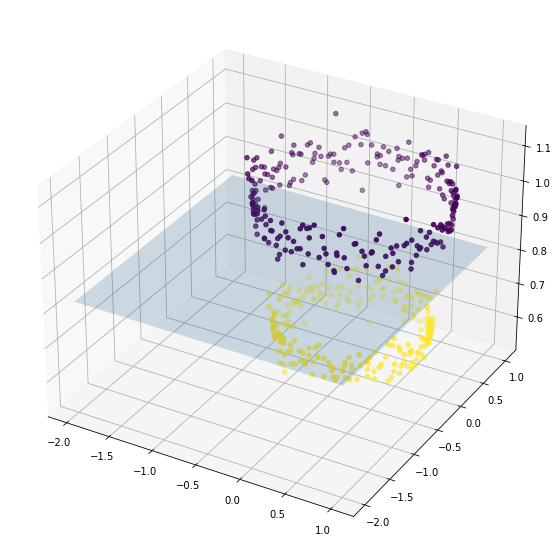

In [20]:
ax = plot3d(X_, False)
ax.plot_surface(xx, yy, z, alpha=0.2)
plt.show()

In [21]:
from sklearn import svm

In [22]:
svc = svm.SVC(kernel="linear")
svc.fit(X, Y)

SVC(kernel='linear')

In [23]:
svc.score(X, Y)

0.502

In [24]:
svc = svm.SVC(kernel='rbf')
svc.fit(X, Y)
svc.score(X, Y)

1.0

In [25]:
svc = svm.SVC(kernel='poly')
svc.fit(X, Y)
svc.score(X, Y)

0.532

In [26]:
def Custom_kernel(x1, x2):
    return np.square(np.dot(x1, x2.T))
svc = svm.SVC(kernel=Custom_kernel)
svc.fit(X, Y)
svc.score(X, Y)

1.0